# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


In [1]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
import numpy as np
from collections import Counter
import pandas as pd
import os
from tqdm import tqdm

# Parameters
years = list(range(2007, 2023))  # 2007–2022
tif_folder = '/content/drive/MyDrive/mapbiomas_exports'
shapefile_path = '/content/drive/MyDrive/BR_municipios_2024/BR_Municipios_2024.shp'
output_folder = '/content/drive/MyDrive/mapbiomas_landcover_csvs'
os.makedirs(output_folder, exist_ok=True)

# Load Amazonas municipalities
gdf = gpd.read_file(shapefile_path)
amazonas_gdf = gdf[gdf['SIGLA_UF'] == 'AM'].copy()

for year in years:
    print(f"\n🔄 Processing year {year}...")
    tile_paths = [
        os.path.join(tif_folder, f'mapbiomas_amazonas_{year}-0000000000-0000000000.tif'),
        os.path.join(tif_folder, f'mapbiomas_amazonas_{year}-0000000000-0000065536.tif')
    ]

    results = []
    for _, row in tqdm(amazonas_gdf.iterrows(), total=amazonas_gdf.shape[0]):
        mun_name = row['NM_MUN']
        geom = [row['geometry'].__geo_interface__]
        total_counts = Counter()

        for tif_path in tile_paths:
            try:
                with rasterio.open(tif_path) as src:
                    clipped, _ = mask(dataset=src, shapes=geom, crop=True)
                    pixels = clipped[0].flatten()
                    counts = Counter(pixels)
                    total_counts.update(counts)
            except Exception:
                continue  # Some tiles don't intersect — skip silently

        # Clean result (remove no-data, convert to int)
        class_counts = {int(k): int(v) for k, v in total_counts.items() if k != 0}
        if not class_counts:
            print(f"⚠️ Skipping {mun_name} in {year} (no overlap in any tile)")
            continue

        result = {'municipality': mun_name, 'year': year}
        result.update(class_counts)
        results.append(result)

    df_year = pd.DataFrame(results)
    df_year.to_csv(os.path.join(output_folder, f'mapbiomas_amazonas_{year}_landcover.csv'), index=False)
    print(f"✅ Saved {year} CSV with {len(df_year)} rows")

# Combine all CSVs
print("\n📦 Merging all yearly CSVs...")
all_dfs = []
for year in years:
    path = os.path.join(output_folder, f'mapbiomas_amazonas_{year}_landcover.csv')
    if os.path.exists(path):
        all_dfs.append(pd.read_csv(path))

if all_dfs:
    full_df = pd.concat(all_dfs, ignore_index=True)
    full_df.to_csv(os.path.join(output_folder, 'mapbiomas_amazonas_all_years.csv'), index=False)
    print("🎉 Saved merged CSV: mapbiomas_amazonas_all_years.csv")
else:
    print("⚠️ No yearly CSVs found to merge.")


🔄 Processing year 2007...


100%|██████████| 62/62 [14:11<00:00, 13.73s/it]


✅ Saved 2007 CSV with 62 rows

🔄 Processing year 2008...


100%|██████████| 62/62 [14:07<00:00, 13.67s/it]


✅ Saved 2008 CSV with 62 rows

🔄 Processing year 2009...


100%|██████████| 62/62 [14:10<00:00, 13.71s/it]


✅ Saved 2009 CSV with 62 rows

🔄 Processing year 2010...


100%|██████████| 62/62 [14:08<00:00, 13.69s/it]


✅ Saved 2010 CSV with 62 rows

🔄 Processing year 2011...


100%|██████████| 62/62 [14:10<00:00, 13.71s/it]


✅ Saved 2011 CSV with 62 rows

🔄 Processing year 2012...


100%|██████████| 62/62 [14:04<00:00, 13.62s/it]


✅ Saved 2012 CSV with 62 rows

🔄 Processing year 2013...


100%|██████████| 62/62 [14:07<00:00, 13.66s/it]


✅ Saved 2013 CSV with 62 rows

🔄 Processing year 2014...


100%|██████████| 62/62 [14:10<00:00, 13.72s/it]


✅ Saved 2014 CSV with 62 rows

🔄 Processing year 2015...


100%|██████████| 62/62 [14:06<00:00, 13.65s/it]


✅ Saved 2015 CSV with 62 rows

🔄 Processing year 2016...


100%|██████████| 62/62 [13:58<00:00, 13.53s/it]


✅ Saved 2016 CSV with 62 rows

🔄 Processing year 2017...


100%|██████████| 62/62 [14:14<00:00, 13.79s/it]


✅ Saved 2017 CSV with 62 rows

🔄 Processing year 2018...


100%|██████████| 62/62 [14:04<00:00, 13.62s/it]


✅ Saved 2018 CSV with 62 rows

🔄 Processing year 2019...


100%|██████████| 62/62 [14:09<00:00, 13.71s/it]


✅ Saved 2019 CSV with 62 rows

🔄 Processing year 2020...


100%|██████████| 62/62 [14:09<00:00, 13.70s/it]


✅ Saved 2020 CSV with 62 rows

🔄 Processing year 2021...


100%|██████████| 62/62 [13:56<00:00, 13.50s/it]


✅ Saved 2021 CSV with 62 rows

🔄 Processing year 2022...


100%|██████████| 62/62 [13:54<00:00, 13.46s/it]

✅ Saved 2022 CSV with 62 rows

📦 Merging all yearly CSVs...
🎉 Saved merged CSV: mapbiomas_amazonas_all_years.csv


In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/mapbiomas_landcover_csvs/mapbiomas_amazonas_all_years.csv')
df.fillna(0, inplace=True)

# Overview
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nPreview:")
display(df.head())

# Info on data types
df.info()

Shape: (992, 17)

Columns: ['municipality', 'year', '33', '11', '6', '3', '24', '15', '12', '25', '4', '30', '41', '29', '20', '39', '31']

Preview:


,municipality,year,33,11,6,3,24,15,12,25,4,30,41,29,20,39,31
0,Careiro da Várzea,2007,681415,545393,862169,639799,628,175569,38782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Santo Antônio do Içá,2007,591473,23548,4156859,9073394,10519,5590,1669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Boca do Acre,2007,150246,45823,695020,21925783,4239,1492328,5982,111.0,1275.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Tonantins,2007,364962,50222,2139649,4645610,2028,11353,6127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Tefé,2007,742962,87223,1960836,23693942,8030,87770,1582,10.0,315.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   municipality  992 non-null    object 
 1   year          992 non-null    int64  
 2   33            992 non-null    int64  
 3   11            992 non-null    int64  
 4   6             992 non-null    int64  
 5   3             992 non-null    int64  
 6   24            992 non-null    int64  
 7   15            992 non-null    int64  
 8   12            992 non-null    int64  
 9   25            992 non-null    float64
 10  4             992 non-null    float64
 11  30            992 non-null    float64
 12  41            992 non-null    float64
 13  29            992 non-null    float64
 14  20            992 non-null    float64
 15  39            992 non-null    float64
 16  31            992 non-null    float64
dtypes: float64(8), int64(8), object(1)
memory usage: 131.9+ KB


## Handling Missing Values

[Identify any missing values in the dataset, and describe your approach to handle them if there are any. If there are no missing values simply indicate that there are none.]


In [5]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# replacing NaNs with 0 (land cover classes not present in a municipality)
df.fillna(0, inplace=True)

Missing values per column:
 municipality    0
year            0
33              0
11              0
6               0
3               0
24              0
15              0
12              0
25              0
4               0
30              0
41              0
29              0
20              0
39              0
31              0
dtype: int64


## Feature Distributions

[Plot the distribution of various features and target variables. Comment on the skewness, outliers, or any other observations.]


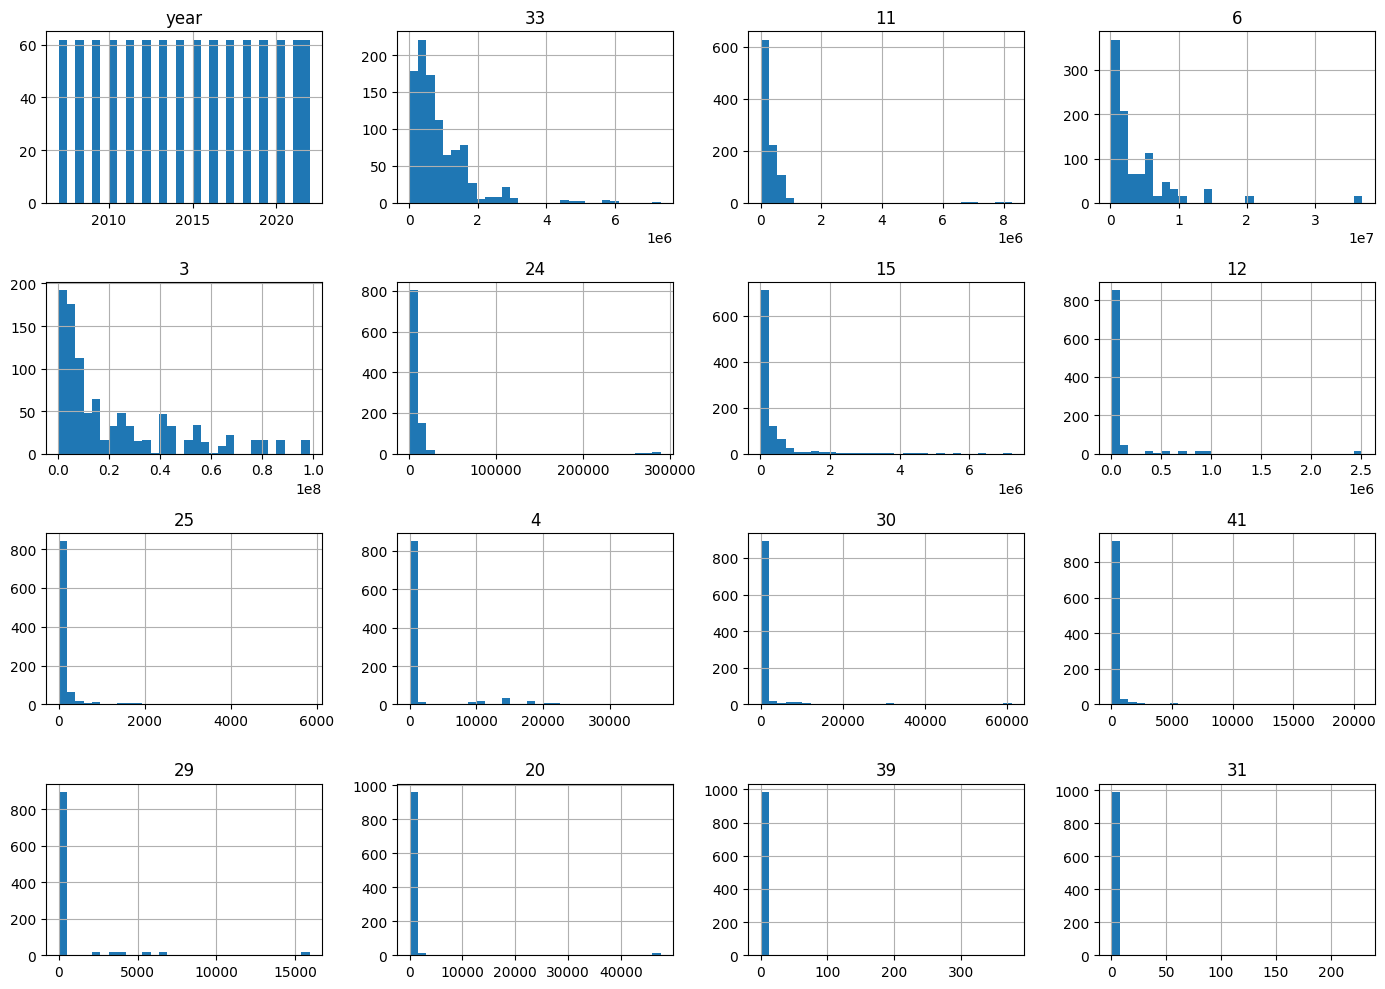

In [6]:
import matplotlib.pyplot as plt

# Plot all numerical distributions
df.hist(figsize=(14, 10), bins=30)
plt.tight_layout()
plt.show()

## Possible Biases

[Investigate the dataset for any biases that could affect the model’s performance and fairness (e.g., class imbalance, historical biases).]


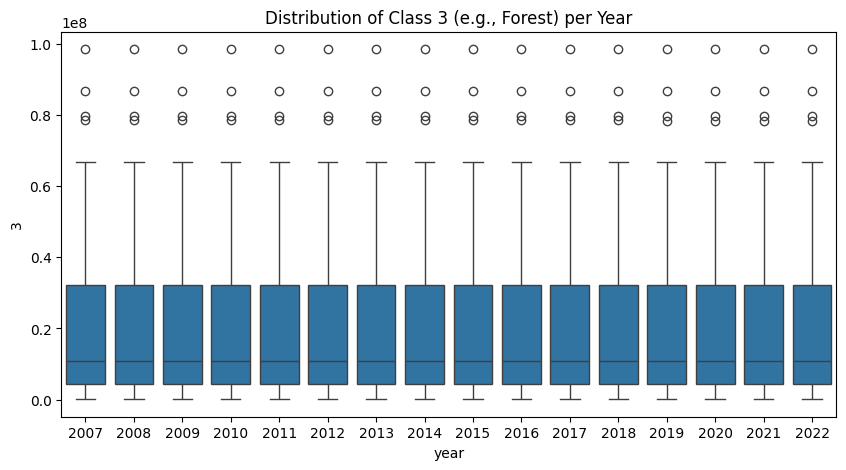

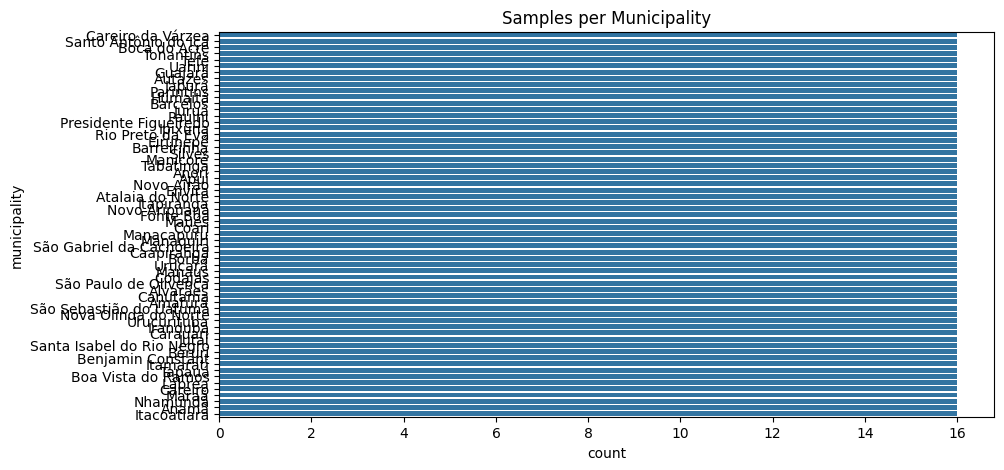

In [7]:
# Distribution of land cover class "3" (e.g., forest) by year
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x='year', y='3', data=df)
plt.title("Distribution of Class 3 (e.g., Forest) per Year")
plt.show()

# Count of records per municipality
plt.figure(figsize=(10, 5))
sns.countplot(y='municipality', data=df, order=df['municipality'].value_counts().index)
plt.title("Samples per Municipality")
plt.show()

## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


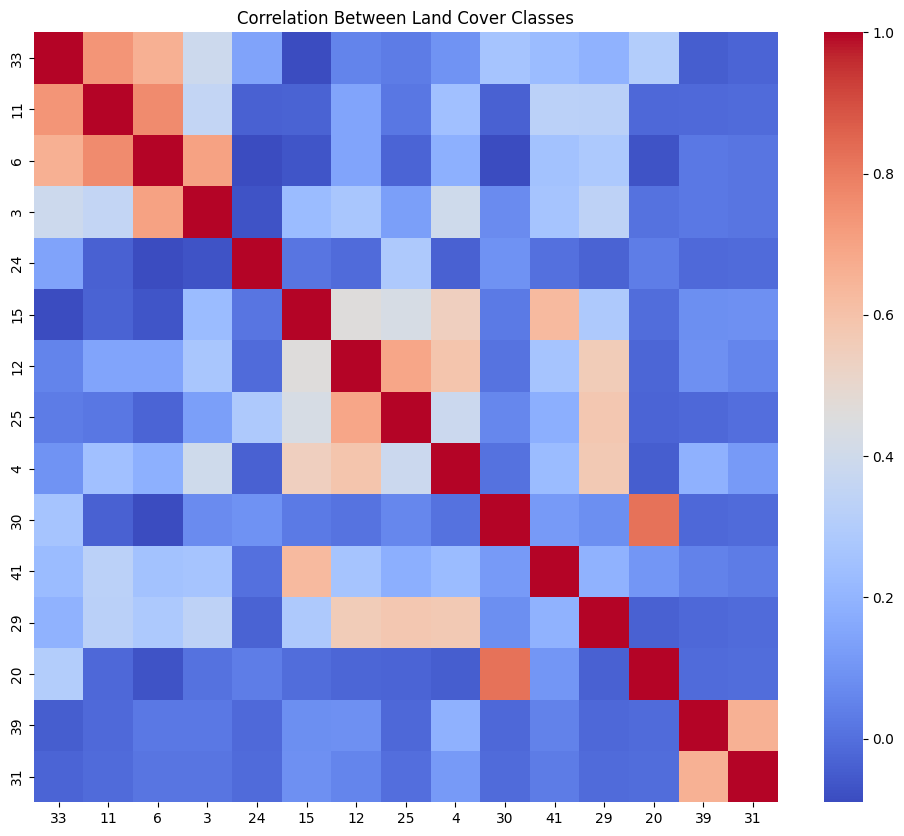

In [8]:
# Only numeric columns (excluding municipality)
numeric_df = df.drop(columns=['municipality', 'year'])

# Correlation matrix
import seaborn as sns
import numpy as np

corr = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Between Land Cover Classes")
plt.show()